<a href="https://colab.research.google.com/github/Marianno77/data-science/blob/main/Uczenie_Maszynowe/Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresja liniowa**

## Import  bibliotek

In [38]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

sns.set()

## Wprowadzenie

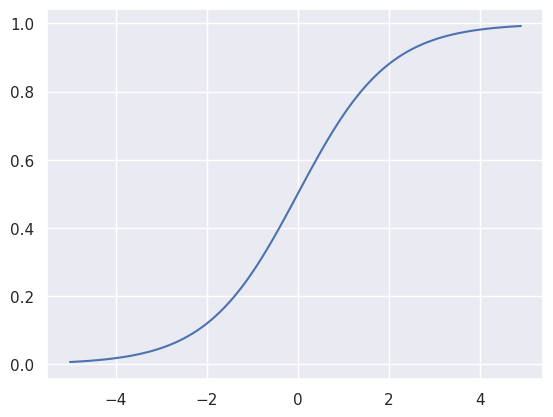

In [4]:
np.random.seed(10)
np.set_printoptions(precision=6, suppress=True)

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

_ = plt.plot(x, y)

## Załadowanie danych

In [7]:
data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [8]:
x = data.data
y = data.target

print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [10]:
df = pd.DataFrame(x, columns=data.feature_names)
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Podział danych na treningowy i testowy

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


## Dopasowanie modelu

In [23]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predykcja na podstawie modelu

In [24]:
y_prob = classifier.predict_proba(x_test)
y_prob

array([[0.986018, 0.013982],
       [0.000355, 0.999645],
       [0.004736, 0.995264],
       [0.999571, 0.000429],
       [0.006348, 0.993652],
       [0.012526, 0.987474],
       [0.00078 , 0.99922 ],
       [0.925663, 0.074337],
       [1.      , 0.      ],
       [0.982322, 0.017678],
       [0.000213, 0.999787],
       [0.000438, 0.999562],
       [0.499853, 0.500147],
       [0.001715, 0.998285],
       [0.999693, 0.000307],
       [0.99788 , 0.00212 ],
       [0.001566, 0.998434],
       [0.16056 , 0.83944 ],
       [0.020663, 0.979337],
       [0.995777, 0.004223],
       [0.616847, 0.383153],
       [0.239229, 0.760771],
       [0.009373, 0.990627],
       [0.089067, 0.910933],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.132576, 0.867424],
       [1.      , 0.      ],
       [0.002067, 0.997933],
       [0.030837, 0.969163],
       [0.002162, 0.997838],
       [0.008899, 0.991101],
       [1.      , 0.      ],
       [0.00121 , 0.99879 ],
       [0.0631

In [26]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

## Ocena modelu

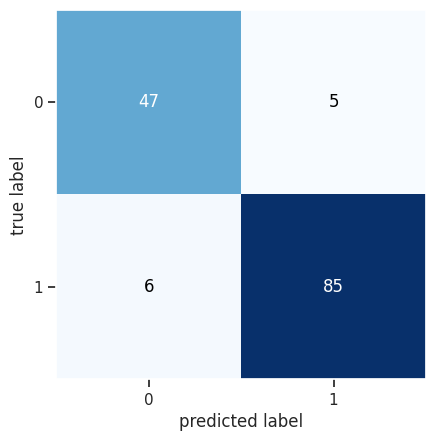

In [34]:
cm = confusion_matrix(y_test, y_pred)
_ = plot_confusion_matrix(cm)

In [33]:
acc = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {acc}%')

Accuracy: 92.3076923076923%


In [37]:
def plotly_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, index=['True_1', 'True_0'], columns=['Pred_0', 'Pred_1'])
  fig = ff.create_annotated_heatmap(cm.values, x=list(cm.columns), y=list(cm.index),
                                    colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title_text=f'Confusion Matrix, Accuracy: {acc:.4f}', font_size=16)
  fig.show()

plotly_confusion_matrix(cm)

In [40]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.90      0.90        52
      benign       0.94      0.93      0.94        91

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

